In [1]:
#Catalog Comparisons

In [2]:
import numpy as np
import pandas as pd
import csky as cy
import matplotlib.pyplot as plt
cy.plotting.mrichman_mpl

<function csky.plotting.mrichman_mpl(tex=True, sans=True, colors=array(['#1f77b4', '#d62728', '#2ca02c', '#ff7f0e', '#9467bd', '#8c564b',
       '#e377c2', '#7f7f7f'], dtype='<U7'))>

In [3]:
redshifts = []
for line in open('../catalogs/Source_List_DNNC_redshifts.txt'):
    if line.split()[-1] == 'NAN':
        redshifts.append(np.nan)
    else:
        redshifts.append(float(line.split()[-1]))

In [4]:
names = []
ras = [] 
decs = []
types = []
srcs = []

#fout = open('../catalogs/initial_list_DNN_20210907.csv')
for line in  open('../catalogs/Source_List_DNNC.txt'):
    print(line.split()[4:])
    names.append(np.str(line.split()[0]))
    ras.append(np.float(line.split()[1]))
    decs.append(np.float(line.split()[2]))
    types.append(np.str(line.split()[3]))
    srcs.append(np.str(line.split()[4:]))

['G343.1-2.3']
['HESS', 'J0835-455']
['PKS', '0426-380']
['PKS', '2155-304']
['Mkn', '421']
['PKS', '0537-441']
['PKS', '0447-439']
['BL', 'Lac']
['PG', '1553+113']
['TXS', '0518+211']
['PKS', '0235+164']
['PKS', '1424+240']
['3C', '66A']
['TXS', '0506+056']
['AP', 'Librae']
['S5', '0716+71']
['B2', '1215+30']
['MH', '2136-428']
['PKS', '2233-148']
['Mkn', '501']
['PMN', 'J1603-4904']
['S2', '0109+22']
['PKS', '0301-243']
['4C', '+01.28']
['PKS', '0700-661']
['TXS', '0628-240']
['PKS', '0823-223']
['PKS', '0735+17']
['PMN', 'J1329-5608']
['PMN', 'J0531-4827']
['MG1', 'J021114+1051']
['PKS', '1440-389']
['OT', '081']
['OJ', '287']
['PKS', '1101-536']
['TXS', '0141+268']
['1H', '1013+498']
['PKS', '0048-09']
['PMN', 'J1650-5044']
['PKS', '0118-272']
['1H', '1914-194']
['PKS', '0332-403']
['OJ', '014']
['PMN', 'J1918-4111']
['PKS', '1936-623']
['1H', '1720+117']
['PMN', 'J1610-6649']
['PMN', 'J0334-3725']
['TXS', '1714-336']
['PKS', '2005-489']
['PKS', 'B1056-113']
['RGB', 'J2243+203']
['

In [5]:
fmatsrcs = []
for src in srcs:
    fmatsrc = src.replace(',', '')
    fmatsrc = fmatsrc.replace('[', '')
    fmatsrc = fmatsrc.replace(']', '')
    fmatsrc = fmatsrc.replace("'", '')
    fmatsrcs.append(fmatsrc)
        
print(fmatsrcs)

['G343.1-2.3', 'HESS J0835-455', 'PKS 0426-380', 'PKS 2155-304', 'Mkn 421', 'PKS 0537-441', 'PKS 0447-439', 'BL Lac', 'PG 1553+113', 'TXS 0518+211', 'PKS 0235+164', 'PKS 1424+240', '3C 66A', 'TXS 0506+056', 'AP Librae', 'S5 0716+71', 'B2 1215+30', 'MH 2136-428', 'PKS 2233-148', 'Mkn 501', 'PMN J1603-4904', 'S2 0109+22', 'PKS 0301-243', '4C +01.28', 'PKS 0700-661', 'TXS 0628-240', 'PKS 0823-223', 'PKS 0735+17', 'PMN J1329-5608', 'PMN J0531-4827', 'MG1 J021114+1051', 'PKS 1440-389', 'OT 081', 'OJ 287', 'PKS 1101-536', 'TXS 0141+268', '1H 1013+498', 'PKS 0048-09', 'PMN J1650-5044', 'PKS 0118-272', '1H 1914-194', 'PKS 0332-403', 'OJ 014', 'PMN J1918-4111', 'PKS 1936-623', '1H 1720+117', 'PMN J1610-6649', 'PMN J0334-3725', 'TXS 1714-336', 'PKS 2005-489', 'PKS B1056-113', 'RGB J2243+203', '1ES 1959+650', 'S4 0814+42', 'KUV 00311-1938', 'PMN J2250-2806', '1RXS J130421.2-435308', 'PMN J0810-7530', '3C 454.3', 'PKS 1424-41', '3C 279', 'CTA 102', 'PKS 1510-089', 'PKS 0454-234', 'PKS 1502+106', '

In [6]:
DNN= pd.DataFrame(np.vstack([np.array(names),np.array(ras),np.array(decs),np.array(types),np.array(fmatsrcs), np.array(redshifts)]).T,  
                  columns=['Names', 'RA', 'DEC', 'Types', 'SRC', 'Redshift_Distances'])

In [7]:
DNN = DNN.drop(index=96)

In [8]:
len(DNN.SRC.values)

109

In [9]:
DNN['RA'] = pd.to_numeric(DNN.RA)
DNN['DEC'] = pd.to_numeric(DNN.DEC)

In [10]:
np.save('../catalogs/Source_List_DNNC.npy', DNN.to_numpy())
DNN.to_pickle('../catalogs/Source_List_DNNC.pickle')

In [11]:
print('|-')
for i in range(len(DNN)):
    print('| {} || {} || {} || {} || {} || {} || {}'.format(i+1,
        DNN.Names[i], DNN.RA[i], DNN.DEC[i], DNN.Types[i], DNN.SRC[i], DNN.Redshift_Distances[i]))
    print('|-')

|-
| 1 || HESSJ1708-443 || 257.0 || -44.3 || pwn || G343.1-2.3 || 5e-10
|-
| 2 || VelaX || 128.287 || -45.19 || pwn || HESS J0835-455 || 6.8e-11
|-
| 3 || 4FGLJ0428.6-3756 || 67.173 || -37.9403 || bll || PKS 0426-380 || 1.111
|-
| 4 || 4FGLJ2158.8-3013 || 329.7141 || -30.2251 || bll || PKS 2155-304 || 0.116
|-
| 5 || 4FGLJ1104.4+3812 || 166.1187 || 38.207 || BLL || Mkn 421 || 0.031
|-
| 6 || 4FGLJ0538.8-4405 || 84.7089 || -44.0862 || BLL || PKS 0537-441 || 0.892
|-
| 7 || 4FGLJ0449.4-4350 || 72.3582 || -43.835 || bll || PKS 0447-439 || 0.107
|-
| 8 || 4FGLJ2202.7+4216 || 330.6946 || 42.2821 || BLL || BL Lac || 0.069
|-
| 9 || 4FGLJ1555.7+1111 || 238.9313 || 11.1884 || BLL || PG 1553+113 || 0.36
|-
| 10 || 4FGLJ0521.8+2112 || 80.4445 || 21.2131 || bll || TXS 0518+211 || 0.108
|-
| 11 || 4FGLJ0238.6+1637 || 39.668 || 16.6179 || BLL || PKS 0235+164 || 0.94
|-
| 12 || 4FGLJ1427.0+2348 || 216.7558 || 23.8013 || BLL || PKS 1424+240 || 0.16
|-
| 13 || 4FGLJ0222.6+4302 || 35.6696 || 43.0357 ||

KeyError: 96

In [12]:
DNN['RA'] = pd.to_numeric(DNN.RA)
DNN['DEC'] = pd.to_numeric(DNN.DEC)

In [13]:
ex_DNN = DNN.drop([104, 106, 107])

In [14]:
ex_DNN.RA.values

array([257.    , 128.287 ,  67.173 , 329.7141, 166.1187,  84.7089,
        72.3582, 330.6946, 238.9313,  80.4445,  39.668 , 216.7558,
        35.6696,  77.3593, 229.4254, 110.4882, 184.4762, 324.8546,
       339.1444, 253.4738, 240.9665,  18.0294,  45.8625, 164.624 ,
       105.1293,  97.7414, 126.4991, 114.5387, 202.2672,  83.0022,
        32.8091, 220.9908, 267.8776, 133.7071, 165.9757,  26.1502,
       153.768 ,  12.6753, 252.5894,  20.1227, 289.4384,  53.5566,
       122.861 , 289.5643, 295.3468, 261.2713, 242.6919,  53.5556,
       259.3985, 302.3595, 164.8063, 340.9895, 300.011 , 124.5572,
         8.3954, 342.6903, 196.0883, 122.7513, 343.4963, 216.9866,
       194.0415, 338.1525, 228.2147,  74.2608, 226.1033, 278.4101,
       352.3294, 112.5776, 186.2277, 356.303 ,  17.1695, 306.422 ,
       179.884 , 248.8168, 191.6887, 230.5454, 171.7634,  39.4737,
       263.2632, 122.065 ,  32.6946,  54.8771,  76.3431,  60.975 ,
       270.6711, 246.4453, 314.0715, 187.2675, 326.8268, 189.8

In [15]:
ex_DNN_ras = ex_DNN.RA
ex_DNN_decs = ex_DNN.DEC

In [16]:
ESTES = np.load('../catalogs/Source_List_ESTES.txt')

In [17]:
ESTES_decs = ESTES[0]
ESTES_ras = ESTES[1]

In [18]:
import healpy as hp

In [19]:
print(sum(ex_DNN_decs < -75))
print(sum(ex_DNN_decs > 75))

print(sum(ESTES_decs < - 75))
print(sum(ESTES_decs > 75))

2
1
1
1


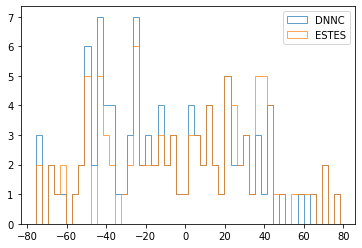

In [20]:
plt.hist(ex_DNN_decs, bins=50, histtype='step', label='DNNC', alpha=.7);
plt.hist(ESTES_decs, bins=50, histtype='step', label='ESTES', alpha=.7);
plt.legend()

In [25]:
DNN[DNN.SRC == 'PMN J1650-5044']

,Names,RA,DEC,Types,SRC,Redshift_Distances
38,4FGLJ1650.3-5045,252.5894,-50.7515,bll,PMN J1650-5044,nan


/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you wi

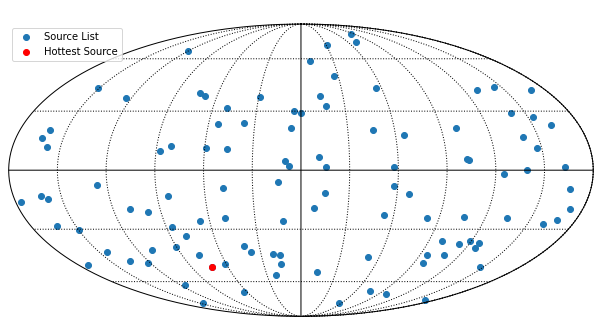

In [26]:
hp.mollview()
hp.graticule()
plt.title(' ')
hp.projscatter(np.radians(DNN.DEC) - np.pi/2, np.radians(DNN.RA), label = 'Source List', alpha = 1)
hp.projscatter(np.radians(-50.7525) - np.pi/2, np.radians(252.5894), label='Hottest Source', c='r')
plt.legend()

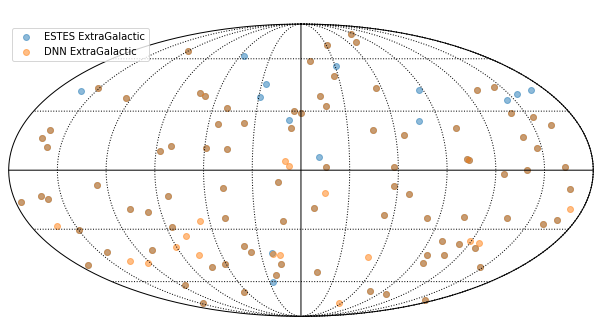

In [22]:
hp.mollview()
hp.graticule()
plt.title(' ')
hp.projscatter(np.radians(ESTES_decs) - np.pi/2, np.radians(ESTES_ras), label = 'ESTES ExtraGalactic', alpha = .5)
hp.projscatter(np.radians(ex_DNN_decs) - np.pi/2,np.radians(ex_DNN_ras),  label = 'DNN ExtraGalactic', alpha = .5)
plt.legend()

In [ ]:
dnns = 0
estes = 0
#print(len(np.intersect1d(np.round(ex_DNN_decs,2), np.round(ESTES_decs, 2))))
uniques = np.setxor1d(np.round(ex_DNN_decs,2).values , np.round(ESTES_decs, 2))
for u in uniques:
    print(u)
    if u in np.round(ex_DNN_decs,2).values: 
        print('In DNN')
        dnns+=1
    if u in np.round(ESTES_decs, 2):
        print('In ESTES')
        estes+=1
        
print(dnns)
print(estes)

In [ ]:
#nearest neighbor
from icecube import astro

In [ ]:
min_distances = []
for i, source_ra in enumerate(DNN.RA.values):
    distance = []
    print(i)
    for j, othersrcs_ra in enumerate(DNN.RA.values):
        distance.append(astro.angular_distance(DNN.RA[i], DNN.DEC[i], DNN.RA[j], DNN.DEC[j]))
    #if i == 53:
        #print(distance)
        #plt.hist(distance, bins=110)
    distance = np.array(distance)

    min_distance = np.min(distance[distance > 0.0])
    min_distances.append(min_distance)
    print((min_distance))

In [ ]:
plt.hist(np.degrees(min_distances) , bins=40);
plt.xlabel('Source Nearest Neighbor (Deg)')
plt.ylabel('Counts')


In [ ]:
np.sort(min_distances)

In [ ]:
plt.hist(np.degrees(min_distances), bins=40, range=(0,5));
plt.xlabel('Source Nearest Neighbor (Deg)')
plt.ylabel('Counts')